In [1]:
from nilearn.datasets import fetch_abide_pcp
import pandas as pd
from tqdm import tqdm

from data.ABIDEProcessing import get_subjectIDs, fetch_filenames, phenotypic_data_path, \
                             get_timeseries, get_subject_connectivity, ROOT_FOLDER

from utils.visualize import visualization
from data.PhenotypicData import PhenoDataProcessing

In [2]:
EXEC = False        # Turn to True if you download the dataset for the first time

if EXEC : 
    abide_data_dir = './data/' + 'ABIDE_dataset'       
    num_subjects = 871       # Number of subjects for the ABIDE dataset


    abide_data = fetch_abide_pcp(data_dir = abide_data_dir,
                                n_subjects = num_subjects, 
                                pipeline = 'cpac',
                                derivatives = ['rois_ho'], 
                                quality_checked = True, 
                                verbose = 1,
                                band_pass_filtering = True,
                                global_signal_regression=False)

In [3]:
# Get the subjects IDs
subjectIDs = get_subjectIDs()
# Get the filename associated to each subject
fileNames = fetch_filenames(subject_IDs = subjectIDs)

## Get the time series 
time_series = get_timeseries(subjectIDs, fileNames)

Loading time series: 100%|██████████| 871/871 [00:05<00:00, 147.28it/s]


In [4]:
## Build the connectivity matrix for each subject
for i in tqdm(range(len(subjectIDs)), total = len(subjectIDs), desc = "Saving the connectivity matrices"):
    _ = get_subject_connectivity(time_series[i], subjectID = subjectIDs[i]) 

Saving the connectivity matrices: 100%|██████████| 871/871 [00:04<00:00, 194.00it/s]


$$ \textbf{Visualization of the Time Series and Connectivity Matrix} $$ 

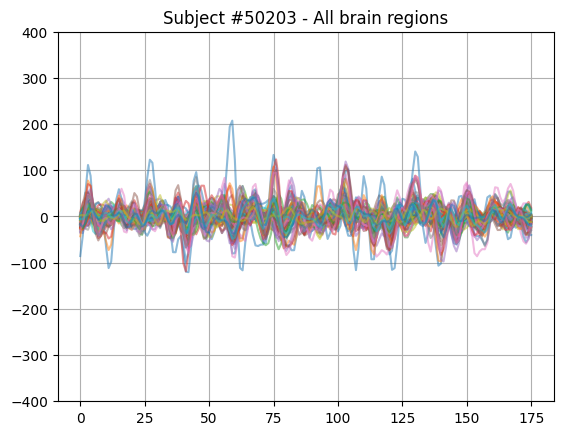

In [5]:
## Setup the visualization class
vis = visualization(subjectIDs = subjectIDs, time_series = time_series, root_folder = ROOT_FOLDER)

# Plot the time series for one subject
vis.plot_ts(idx = 120)

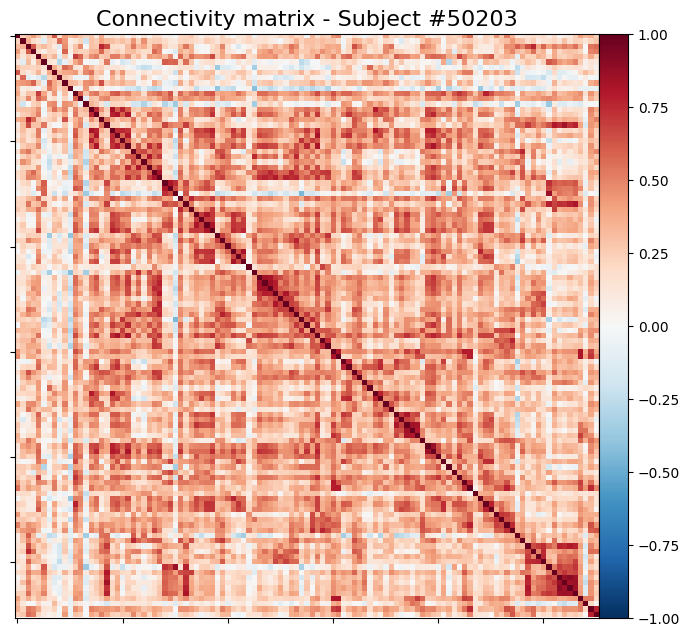

In [6]:
# Visualize the connectivity matrix for one subject
vis.plot_connectivity_matrix(idx = 120)

$$ \textbf{Phenotypic data} $$ 

In [7]:
pdp = PhenoDataProcessing(root_folder = ROOT_FOLDER)

## Extract the phenotypic Dataframe associated to the 871 studied patients
df = pdp.extract_subjects(subjectIDs = subjectIDs)

print(f"The size of the phenotypic DataFrame is {df.shape}")

## First visualization of the DataFrame
df.head()

The size of the phenotypic DataFrame is (871, 106)


,Unnamed: 0.1,Unnamed: 0,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,...,qc_notes_rater_1,qc_anat_rater_2,qc_anat_notes_rater_2,qc_func_rater_2,qc_func_notes_rater_2,qc_anat_rater_3,qc_anat_notes_rater_3,qc_func_rater_3,qc_func_notes_rater_3,SUB_IN_SMP
1,1,2,50003,2,50003,PITT,Pitt_0050003,1,1,24.45,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1
2,2,3,50004,3,50004,PITT,Pitt_0050004,1,1,19.09,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1
3,3,4,50005,4,50005,PITT,Pitt_0050005,1,1,13.73,...,NaN,OK,NaN,maybe,ic-parietal-cerebellum,OK,NaN,OK,NaN,0
4,4,5,50006,5,50006,PITT,Pitt_0050006,1,1,13.37,...,NaN,OK,NaN,maybe,ic-parietal slight,OK,NaN,OK,NaN,1
5,5,6,50007,6,50007,PITT,Pitt_0050007,1,1,17.78,...,NaN,OK,NaN,maybe,ic-cerebellum_temporal_lob,OK,NaN,OK,NaN,1


In [ ]:
# Retrieve the subject labels
subject_labels = pdp.get_subject_labels(subjectIDs = subjectIDs)